In [1]:
# Import Packages
import os
# Change to the working directory
os.chdir('/Users/zepedalab/Desktop/MATHia_NLP_YB')
#Lab Laptop wd:/Users/zepedalab/Desktop/MATHia_NLP_YB
#Home Desktop wd: /Users/yuchengbao/Desktop/ALL Lab/MATHia_NLP

import pandas as pd
import re
import spacy
!python3 -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

/Users/zepedalab/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


/Users/zepedalab/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 13.8 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
# Import Data File
text_df = pd.read_excel('/Users/zepedalab/Desktop/MATHia_NLP_YB/E1C3 Codes + partial E2C3.xlsx')

In [3]:
# Pre-process the text data (text_df)
# Convert the text input to the lower case string
# Remove all non-alphabetic characters
text_df['input'] = text_df['input'].astype(str)
text_df['input'] = text_df['input'].str.lower()
text_df['input'] = text_df['input'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
# Filter out any input that comprise less than 3 characters
text_df = text_df[text_df['input'].str.len() >= 3]
short_input_df = text_df[text_df['input'].str.len() < 3] #short_input_df allows us to manually check

In [4]:
# Detecting the nonsense string
from nostril import nonsense
short_indices = []
nonsense_indices = []

# Iterate through rows and separate nonsense rows
for index, row in text_df.iterrows():
    try:
        text = row['input']
        if len(text) < 6: # Check if the text is too short to test
            # Add the short text to short_text_df
            if len(text) < 6:
                short_indices.append(index)
            continue

        # Use nostril to detect nonsense in the current row's text
        if nonsense(text):
            nonsense_indices.append(index)

    except Exception as e:
        msg = str(e)
        if "Text is too short to test" in msg:
             short_indices.append(index)
        else:
            print(f"Error processing row {index}: {e}")

short_text_df = text_df.loc[short_indices]
nonsense_df = text_df.loc[nonsense_indices]
text_df = text_df.drop(short_indices + nonsense_indices)

In [5]:
# Pre-process those shor input by using the gibberish detector
from gibberish_detector import detector
#os.chdir('/Users/yuchengbao/Desktop/ALL Lab/MATHia_NLP')
#os.system('gibberish-detector train big.txt > gibberish-detector.model')
Detector = detector.create_from_model('/Users/zepedalab/PycharmProjects/MATHia-NLP-YB/gibberish-detector.model')
#lab wd: /Users/zepedalab/PycharmProjects/MATHia-NLP-YB/gibberish-detector.model

In [6]:
gibberish_indices = []

# Iterate through rows and separate gibberish rows
for index, row in text_df.iterrows():
    try:
        # Check if the row is gibberish
        is_gibberish = Detector.is_gibberish(row['input'])

        # If it is gibberish, add to the gibberish_df and remove from text_df_3
        if is_gibberish:
            gibberish_indices.append(index)

    except Exception as e:
        print(f"Error processing row {index}: {e}")

gibbersh_df = text_df.loc[gibberish_indices]

In [7]:
# Import necessary packages for the later NLP analysis
import gensim
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Download the wordnet resource if not already done
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zepedalab/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zepedalab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Tokenize and lemmatize the documents
tokenized_docs = [
    [lemmatizer.lemmatize(word.lower()) for word in gensim.utils.tokenize(doc)
     if word.lower() not in stop_words and word.isalpha()]
    for doc in text_df.input
    if len([word for word in gensim.utils.tokenize(doc) if word.lower() not in stop_words and word.isalpha()]) > 0
]

# Create filtered_docs: Only keep non-empty documents
filtered_docs = [doc for doc in tokenized_docs if len(doc) > 0]

# Filter text_df to remove rows that correspond to empty tokenized documents
# Ensure that text_df_filtered matches filtered_docs in length
text_df_filtered = text_df.iloc[:len(filtered_docs)].reset_index(drop=True)

In [10]:
# create empty dictionary from gensim library (for the vocabulary)
dictionary = gensim.corpora.Dictionary()
# iteratively add each doc to the bag-of-words corpus
bow_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in filtered_docs]

print(len(bow_corpus))
print(len(dictionary))

447
672


In [11]:
for doc in bow_corpus:
    print([[dictionary[id], freq] for id, freq in doc])

print(len(dictionary))

[['awaly', 1], ['better', 1], ['last', 1], ['time', 1]]
[['ask', 2], ['class', 1], ['classmate', 1], ['fellow', 1], ['focus', 1], ['help', 1], ['teacher', 1], ['work', 1]]
[['help', 1], ['work', 1], ['didnt', 1], ['hecking', 1], ['hit', 1], ['make', 1], ['since', 1], ['solve', 1], ['use', 1], ['would', 1]]
[['would', 1], ['fail', 1], ['happen', 1], ['motivated', 1], ['thinking', 1]]
[['work', 1], ['less', 1]]
[['going', 1], ['hard', 1], ['kept', 1], ['worked', 1]]
[['hard', 1], ['worked', 1], ['done', 1], ['get', 1], ['try', 1]]
[['get', 1], ['idk', 1], ['school', 1]]
[['time', 1], ['focus', 1], ['took', 1]]
[['keep', 1], ['tring', 1]]
[['many', 1], ['motivate', 1], ['ok', 1], ['one', 1], ['question', 1], ['saying', 1], ['way', 1]]
[['work', 1], ['motivated', 1], ['hard', 1], ['myslef', 1], ['reminding', 1], ['reward', 1]]
[['end', 1], ['goal', 1], ['set', 1], ['something', 1], ['want', 1]]
[['time', 1], ['didnt', 1], ['get', 1], ['took', 1], ['focused', 1], ['stressed', 1]]
[['thinkin

In [12]:
import numpy as np

# Get vocab from dictionary
vocab = pd.Series(dictionary.token2id).index

# Sequence of numbers as long as the documents
index = range(len(bow_corpus))

# Create a pandas dataframe full of zeros.
bow_df = pd.DataFrame(data=np.zeros((len(bow_corpus), len(dictionary)), dtype=np.float32),
                  index=index, # row labels
                  columns=vocab) #column labels

# Add each word from the bag-of-words corpus to the matrix.
for idx in index:
  for id, freq in bow_corpus[idx]:
    bow_df.loc[idx,dictionary[id]] = freq
    # updates the specific cell in the DataFrame using by using the document index (row) idx
    # and token ID (column) id, which has been mapped back into the token (word)
    # and sets it to the token's frequency freq

# Transpose the matrix for easy reading
bow_df.T

,0,1,2,3,4,5,6,7,8,9,...,437,438,439,440,441,442,443,444,445,446
awaly,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
better,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
last,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
time,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ask,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
went,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
push,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
continue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
# Calculating Inverse Document Frequency

num_documents = len(bow_df) #get the length of the documents
print(num_documents) #this will be six. Note the df is not transposed

# function of idf
def idf(term):
  documents_containing_term = (bow_df[term] > 0).sum()    # sum of documents containing the term
  return np.log(num_documents+1/documents_containing_term+1)  # divide the number of documents by the num documents with the term and get the log.

# dictionary comprehension to apply the idf function to every word (column) in the bow_df DataFrame
idf = pd.Series({term:idf(term) for term in bow_df.columns}) # create dictionary with key value pair of term:idf(term)
idf

447


awaly           6.107023
better          6.105072
last            6.105537
time            6.104996
ask             6.105165
                  ...   
unit            6.107023
went            6.107023
push            6.107023
continue        6.107023
okasadjdbhjf    6.107023
Length: 672, dtype: float64

In [14]:
#Calculate Term Frequency
# divide each token count by the total token count for the row.
tf_df = bow_df.div(bow_df.sum(axis='columns'), axis='rows')

tf_df

,awaly,better,last,time,ask,class,classmate,fellow,focus,help,...,enough,pay,sucessful,belving,motavited,unit,went,push,continue,okasadjdbhjf
0,0.25,0.25,0.25,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,0.00,0.00,0.00,0.00,0.222222,0.111111,0.111111,0.111111,0.111111,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
443,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0
444,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
445,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0


In [16]:
#Calculate the TF-IDF score

tfidf_df = tf_df.copy().multiply(idf, axis='columns')
# make copy of tf_df that is tf/idf

# Transpose it for readability
tfidf_df

,awaly,better,last,time,ask,class,classmate,fellow,focus,help,...,enough,pay,sucessful,belving,motavited,unit,went,push,continue,okasadjdbhjf
0,1.526756,1.526268,1.526384,1.526249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,1.356703,0.678346,0.678434,0.678558,0.678333,0.678321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.526249,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.526756,0.000000
444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
445,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.107023


Willpower
0    343
1    104
Name: count, dtype: int64

Balanced class counts:
Willpower
1    104
0    104
Name: count, dtype: int64

Classes in classifier: [0 1]

Logistic Regression Accuracy (Balanced Data): 0.9375
Logistic Regression Precision (Balanced Data): 0.941747572815534
Logistic Regression Recall (Balanced Data): 0.9326923076923077

Classification Report (Balanced Data):
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       104
           1       0.94      0.93      0.94       104

    accuracy                           0.94       208
   macro avg       0.94      0.94      0.94       208
weighted avg       0.94      0.94      0.94       208



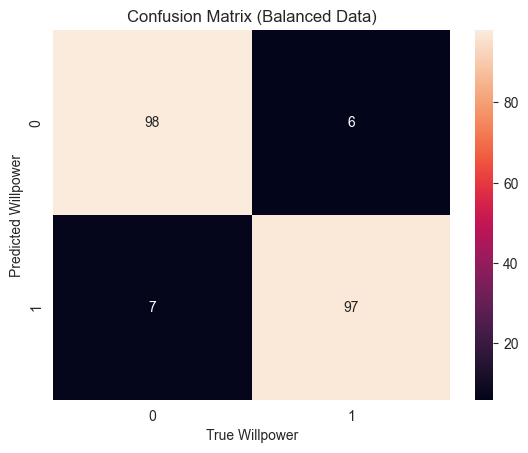


Comparison of top positive and negative predictors:
   feature_pos  coefficient_pos  feature_neg  coefficient_neg
0     everyday         0.791583       harder        -0.528982
1         fail         0.784685       finish        -0.548220
2        tried         0.732350          idk        -0.553234
3      focused         0.715914         stay        -0.553801
4         used         0.646126        right        -0.556803
5       worked         0.610195          end        -0.573652
6       geting         0.608207         take        -0.588541
7     question         0.568344      reading        -0.589624
8         like         0.568111  motivatated        -0.589786
9        candy         0.560495         last        -0.597780
10       never         0.549876        class        -0.613665
11        jusr         0.542868       school        -0.634771
12       stuck         0.520687        going        -0.664607
13      helped         0.520671         hate        -0.665116
14        back   

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Select the target human code
y_raw = text_df_filtered['Willpower']

# Make sure X (tfidf_df) and y share the same indices
valid_idx = tfidf_df.index.intersection(y_raw.index)

X = tfidf_df.loc[valid_idx]
y = y_raw.loc[valid_idx]
print(y.value_counts())

# Build a balanced sub-dataset with equal number of sample coded as 0 and 1

class_counts = y.value_counts()
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()
n_minority = class_counts.min()

# Indices for each class
minority_idx = y[y == minority_class].index
majority_idx_sampled = y[y == majority_class].sample(
    n=n_minority,
    random_state=12434  # reproducibility
).index

balanced_idx = minority_idx.union(majority_idx_sampled)

X_bal = X.loc[balanced_idx]
y_bal = y.loc[balanced_idx]

# Shuffle rows
X_bal, y_bal = shuffle(X_bal, y_bal, random_state=14312)

print("\nBalanced class counts:")
print(y_bal.value_counts())

#Using the balanced dataset to train the machine learning logistic regression model

bal_classifier = LogisticRegression(max_iter=1000)
bal_classifier.fit(X_bal, y_bal)

print("\nClasses in classifier:", bal_classifier.classes_)

# Predict on balanced data (for quick check)
predicted_bal = bal_classifier.predict(X_bal)

# Print out the evaluation metrics

print("\nLogistic Regression Accuracy (Balanced Data):",
      metrics.accuracy_score(y_bal, predicted_bal))
print("Logistic Regression Precision (Balanced Data):",
      metrics.precision_score(y_bal, predicted_bal))
print("Logistic Regression Recall (Balanced Data):",
      metrics.recall_score(y_bal, predicted_bal))

print("\nClassification Report (Balanced Data):\n",
      metrics.classification_report(y_bal, predicted_bal))

# Confusion matrix
cm_bal = metrics.confusion_matrix(y_bal, predicted_bal)

sns.heatmap(cm_bal, annot=True, fmt='d')
plt.title('Confusion Matrix (Balanced Data)')
plt.xlabel('True Willpower')
plt.ylabel('Predicted Willpower')
plt.show()

# Print out the logistic coefficients for the top word list

# For binary classification in sklearn:
# bal_classifier.coef_[0] corresponds to the SECOND class in bal_classifier.classes_
positive_class = bal_classifier.classes_[1]

coef = bal_classifier.coef_[0]         # shape: (n_features,)
feature_names = X_bal.columns          # TF-IDF feature names

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coef
})

# Sort descending: largest positive coefficients first
coef_df_sorted = coef_df.sort_values(by='coefficient', ascending=False)

# Top words predicting the positive_class and negative_class (Top 20 for each)
top_20_pos = coef_df_sorted.head(20)
top_20_neg = coef_df_sorted.tail(20)


highest_20 = top_20_pos.reset_index(drop=True)
lowest_20 = top_20_neg.reset_index(drop=True)

highest_20.columns = [col + "_pos" for col in highest_20.columns]
lowest_20.columns = [col + "_neg" for col in lowest_20.columns]

coef_compare = pd.concat([highest_20, lowest_20], axis=1)

print("\nComparison of top positive and negative predictors:")
print(coef_compare)


In [31]:
#Print out more positive and negative predictor words
# =====================================

# All words with positive coefficients (predict the positive_class)
pos_df = coef_df_sorted[coef_df_sorted['coefficient'] > 0].copy()
neg_df = coef_df_sorted[coef_df_sorted['coefficient'] < 0].copy()

pos_words = pos_df['feature'].tolist()
neg_words = neg_df['feature'].tolist()

print("\nTotal positive-predictor words:", len(pos_words))
print("Total negative-predictor words:", len(neg_words))

print("\nFirst top 50 positive words:")
print(pos_words[:50])

print("\nFirst top 50 negative words:")
print(neg_words[:50])


Total positive-predictor words: 225
Total negative-predictor words: 220

First top 50 positive words:
['everyday', 'fail', 'tried', 'focused', 'used', 'worked', 'geting', 'question', 'like', 'candy', 'never', 'jusr', 'stuck', 'helped', 'back', 'collage', 'keeping', 'well', 'alway', 'stayed', 'much', 'clam', 'increase', 'though', 'solution', 'music', 'somewhat', 'agree', 'basic', 'nothing', 'disagree', 'bruhhhh', 'solved', 'thanks', 'bobathan', 'guessing', 'concentrated', 'give', 'stupid', 'hated', 'ask', 'see', 'thinking', 'kept', 'dad', 'play', 'took', 'coukld', 'taking', 'way']

First top 50 negative words:
['reward', 'even', 'use', 'want', 'help', 'thing', 'say', 'nice', 'next', 'mind', 'response', 'intelegience', 'three', 'quickly', 'second', 'cannot', 'alote', 'first', 'really', 'make', 'try', 'didnt', 'dont', 'got', 'math', 'self', 'family', 'answered', 'anything', 'dormir', 'con', 'puen', 'timpo', 'termi', 'tengo', 'sueo', 'soy', 'sique', 'si', 'pongo', 'dibujar', 'perfesionist


=== Final model using top 50 positive + top 50 negative words ===
Total usable features: 100
Accuracy: 0.7596153846153846
Precision: 0.8552631578947368
Recall: 0.625

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.89      0.79       104
           1       0.86      0.62      0.72       104

    accuracy                           0.76       208
   macro avg       0.78      0.76      0.76       208
weighted avg       0.78      0.76      0.76       208


Confusion Matrix:
[[93 11]
 [39 65]]


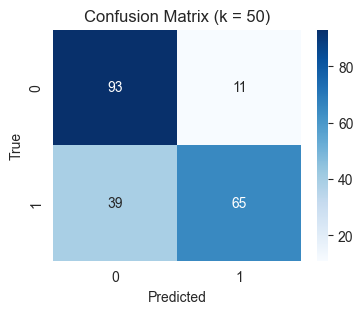

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# ===========================
# Final evaluation with k = 50
# ===========================
def evaluate_final_k(X_bal, y_bal, pos_words, neg_words):

    k = 50
    print(f"\n=== Final model using top {k} positive + top {k} negative words ===")

    # 1. Select the top 50 pos + 50 neg words
    pos_k = pos_words[:k]
    neg_k = neg_words[:k]
    selected_features = pos_k + neg_k

    # Ensure the selected features exist in TF-IDF columns
    selected_features = [w for w in selected_features if w in X_bal.columns]
    print(f"Total usable features: {len(selected_features)}")

    # 2. Subset TF-IDF matrix
    X_sub = X_bal[selected_features]

    # 3. Train logistic regression on full dataset
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_sub, y_bal)

    # 4. Predict on training data (you can later swap to test set if needed)
    y_pred = clf.predict(X_sub)

    # 5. Evaluation metrics
    print("Accuracy:", metrics.accuracy_score(y_bal, y_pred))
    print("Precision:", metrics.precision_score(y_bal, y_pred))
    print("Recall:", metrics.recall_score(y_bal, y_pred))
    print("\nClassification Report:\n",
          metrics.classification_report(y_bal, y_pred))

    # 6. Confusion matrix
    cm = metrics.confusion_matrix(y_bal, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Optional: show confusion matrix heatmap
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title("Confusion Matrix (k = 50)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    return clf, selected_features, cm

# =====================================
# Run final model
# =====================================
clf_50, features_50, cm_50 = evaluate_final_k(
    X_bal=X_bal,
    y_bal=y_bal,
    pos_words=pos_words,
    neg_words=neg_words
)


Performance Self-Talk

Performance Self-Talk (Approach/Avoidance)
0    400
1     47
Name: count, dtype: int64

Balanced class counts:
Performance Self-Talk (Approach/Avoidance)
1    47
0    47
Name: count, dtype: int64

Classes in classifier: [0 1]

Logistic Regression Accuracy (Balanced Data): 0.9893617021276596
Logistic Regression Precision (Balanced Data): 0.9791666666666666
Logistic Regression Recall (Balanced Data): 1.0

Classification Report (Balanced Data):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.98      1.00      0.99        47

    accuracy                           0.99        94
   macro avg       0.99      0.99      0.99        94
weighted avg       0.99      0.99      0.99        94



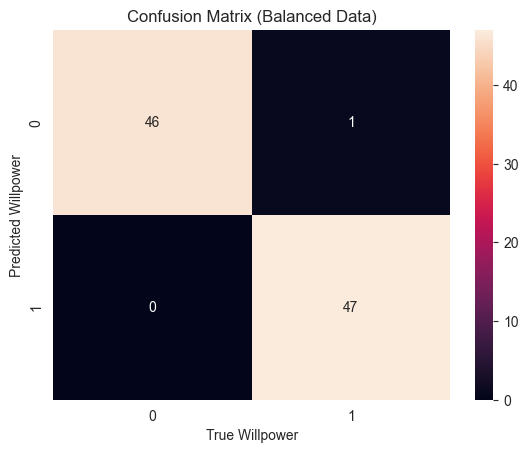


Comparison of top positive and negative predictors:
     feature_pos  coefficient_pos feature_neg  coefficient_neg
0          topic         0.818216        went        -0.402388
1          grade         0.705998         day        -0.403017
2     everything         0.704401     keeping        -0.406578
3         saying         0.682405   foucoused        -0.406652
4          super         0.665712    confused        -0.422378
5           want         0.657865       basic        -0.423658
6        focused         0.624198        like        -0.461945
7           hate         0.612346       tried        -0.474797
8           know         0.537716    question        -0.485663
9        belving         0.491013        easy        -0.522616
10          test         0.463178       tring        -0.527752
11         going         0.461142        high        -0.551758
12         eagle         0.443026    everyday        -0.562082
13         sleep         0.442703       right        -0.571213
14

In [39]:
# Select the target human code
y_raw = text_df_filtered['Performance Self-Talk (Approach/Avoidance)']

# Make sure X (tfidf_df) and y share the same indices
valid_idx = tfidf_df.index.intersection(y_raw.index)

X = tfidf_df.loc[valid_idx]
y = y_raw.loc[valid_idx]
print(y.value_counts())

# Build a balanced sub-dataset with equal number of sample coded as 0 and 1

class_counts = y.value_counts()
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()
n_minority = class_counts.min()

# Indices for each class
minority_idx = y[y == minority_class].index
majority_idx_sampled = y[y == majority_class].sample(
    n=n_minority,
    random_state=12434  # reproducibility
).index

balanced_idx = minority_idx.union(majority_idx_sampled)

X_bal = X.loc[balanced_idx]
y_bal = y.loc[balanced_idx]

# Shuffle rows
X_bal, y_bal = shuffle(X_bal, y_bal, random_state=14312)

print("\nBalanced class counts:")
print(y_bal.value_counts())

#Using the balanced dataset to train the machine learning logistic regression model

bal_classifier = LogisticRegression(max_iter=1000)
bal_classifier.fit(X_bal, y_bal)

print("\nClasses in classifier:", bal_classifier.classes_)

# Predict on balanced data (for quick check)
predicted_bal = bal_classifier.predict(X_bal)

# Print out the evaluation metrics

print("\nLogistic Regression Accuracy (Balanced Data):",
      metrics.accuracy_score(y_bal, predicted_bal))
print("Logistic Regression Precision (Balanced Data):",
      metrics.precision_score(y_bal, predicted_bal))
print("Logistic Regression Recall (Balanced Data):",
      metrics.recall_score(y_bal, predicted_bal))

print("\nClassification Report (Balanced Data):\n",
      metrics.classification_report(y_bal, predicted_bal))

# Confusion matrix
cm_bal = metrics.confusion_matrix(y_bal, predicted_bal)

sns.heatmap(cm_bal, annot=True, fmt='d')
plt.title('Confusion Matrix (Balanced Data)')
plt.xlabel('True Willpower')
plt.ylabel('Predicted Willpower')
plt.show()

# Print out the logistic coefficients for the top word list

# For binary classification in sklearn:
# bal_classifier.coef_[0] corresponds to the SECOND class in bal_classifier.classes_
positive_class = bal_classifier.classes_[1]

coef = bal_classifier.coef_[0]         # shape: (n_features,)
feature_names = X_bal.columns          # TF-IDF feature names

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coef
})

# Sort descending: largest positive coefficients first
coef_df_sorted = coef_df.sort_values(by='coefficient', ascending=False)

# Top words predicting the positive_class and negative_class (Top 20 for each)
top_20_pos = coef_df_sorted.head(20)
top_20_neg = coef_df_sorted.tail(20)


highest_20 = top_20_pos.reset_index(drop=True)
lowest_20 = top_20_neg.reset_index(drop=True)

highest_20.columns = [col + "_pos" for col in highest_20.columns]
lowest_20.columns = [col + "_neg" for col in lowest_20.columns]

coef_compare = pd.concat([highest_20, lowest_20], axis=1)

print("\nComparison of top positive and negative predictors:")
print(coef_compare)


In [40]:
#Print out more positive and negative predictor words
# =====================================

# All words with positive coefficients (predict the positive_class)
pos_df = coef_df_sorted[coef_df_sorted['coefficient'] > 0].copy()
neg_df = coef_df_sorted[coef_df_sorted['coefficient'] < 0].copy()

pos_words = pos_df['feature'].tolist()
neg_words = neg_df['feature'].tolist()

print("\nTotal positive-predictor words:", len(pos_words))
print("Total negative-predictor words:", len(neg_words))

print("\nFirst top 50 positive words:")
print(pos_words[:50])

print("\nFirst top 50 negative words:")
print(neg_words[:50])


Total positive-predictor words: 125
Total negative-predictor words: 119

First top 50 positive words:
['topic', 'grade', 'everything', 'saying', 'super', 'want', 'focused', 'hate', 'know', 'belving', 'test', 'going', 'eagle', 'sleep', 'pushing', 'dormir', 'concentrated', 'distracting', 'learn', 'knowlge', 'working', 'jusrt', 'ut', 'also', 'felt', 'far', 'way', 'cooked', 'w', 'problem', 'thinking', 'proud', 'time', 'okay', 'bit', 'told', 'improved', 'write', 'say', 'make', 'mom', 'awaly', 'better', 'selth', 'chaing', 'modivated', 'staar', 'zero', 'asked', 'academy']

First top 50 negative words:
['wanted', 'worked', 'work', 'dont', 'getting', 'tofay', 'maybe', 'worth', 'que', 'mi', 'se', 'muy', 'comprendo', 'gracias', 'mismo', 'mtive', 'por', 'problemas', 'hor', 'sabia', 'en', 'bien', 'dios', 'los', 'lot', 'motvied', 'try', 'read', 'mathia', 'equation', 'stuck', 'couldnt', 'alot', 'answer', 'harder', 'evaluate', 'kept', 'disagree', 'number', 'picked', 'shouldve', 'gave', 'think', 'hace


=== Final model using top 50 positive + top 50 negative words ===
Total usable features: 100
Accuracy: 0.8936170212765957
Precision: 0.9512195121951219
Recall: 0.8297872340425532

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        47
           1       0.95      0.83      0.89        47

    accuracy                           0.89        94
   macro avg       0.90      0.89      0.89        94
weighted avg       0.90      0.89      0.89        94


Confusion Matrix:
[[45  2]
 [ 8 39]]


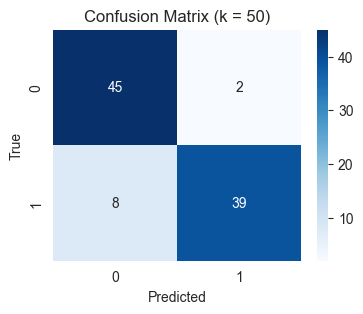

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# ===========================
# Final evaluation with k = 50
# ===========================
def evaluate_final_k(X_bal, y_bal, pos_words, neg_words):

    k = 50
    print(f"\n=== Final model using top {k} positive + top {k} negative words ===")

    # 1. Select the top 50 pos + 50 neg words
    pos_k = pos_words[:k]
    neg_k = neg_words[:k]
    selected_features = pos_k + neg_k

    # Ensure the selected features exist in TF-IDF columns
    selected_features = [w for w in selected_features if w in X_bal.columns]
    print(f"Total usable features: {len(selected_features)}")

    # 2. Subset TF-IDF matrix
    X_sub = X_bal[selected_features]

    # 3. Train logistic regression on full dataset
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_sub, y_bal)

    # 4. Predict on training data (you can later swap to test set if needed)
    y_pred = clf.predict(X_sub)

    # 5. Evaluation metrics
    print("Accuracy:", metrics.accuracy_score(y_bal, y_pred))
    print("Precision:", metrics.precision_score(y_bal, y_pred))
    print("Recall:", metrics.recall_score(y_bal, y_pred))
    print("\nClassification Report:\n",
          metrics.classification_report(y_bal, y_pred))

    # 6. Confusion matrix
    cm = metrics.confusion_matrix(y_bal, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Optional: show confusion matrix heatmap
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title("Confusion Matrix (k = 50)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    return clf, selected_features, cm

# =====================================
# Run final model
# =====================================
clf_50, features_50, cm_50 = evaluate_final_k(
    X_bal=X_bal,
    y_bal=y_bal,
    pos_words=pos_words,
    neg_words=neg_words
)


Effort

Effort
0.0    403
1.0     44
Name: count, dtype: int64

Balanced class counts:
Effort
0.0    44
1.0    44
Name: count, dtype: int64

Classes in classifier: [0. 1.]

Logistic Regression Accuracy (Balanced Data): 1.0
Logistic Regression Precision (Balanced Data): 1.0
Logistic Regression Recall (Balanced Data): 1.0

Classification Report (Balanced Data):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        44
         1.0       1.00      1.00      1.00        44

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



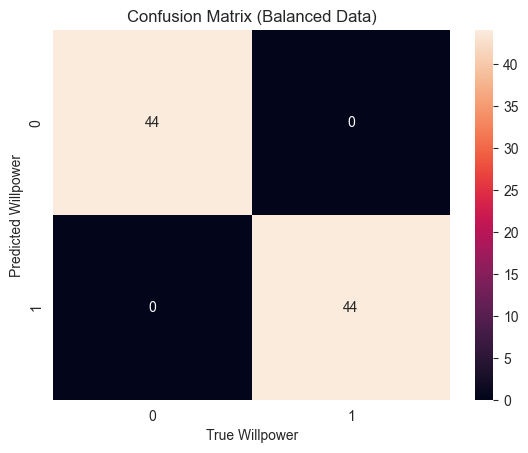


Comparison of top positive and negative predictors:
   feature_pos  coefficient_pos  feature_neg  coefficient_neg
0         dont         0.727750        using        -0.417884
1      getting         0.713957  uyfickfvkuf        -0.426124
2        topic         0.581643      clicked        -0.426157
3          let         0.545934     studying        -0.426178
4        didnt         0.511114         sure        -0.426180
5        music         0.503871    workspace        -0.434363
6       needed         0.489635       stupid        -0.434490
7      knowing         0.431566        hated        -0.434490
8        basic         0.423074       finish        -0.463990
9       unsure         0.423063       saying        -0.469008
10     ertyuio         0.423031         hint        -0.500843
11          ok         0.418167         kept        -0.513038
12      mathia         0.409528         jusr        -0.526566
13    remember         0.398890    finishing        -0.554257
14       fight   

In [43]:
# Select the target human code
y_raw = text_df_filtered['Effort']

# Make sure X (tfidf_df) and y share the same indices
valid_idx = tfidf_df.index.intersection(y_raw.index)

X = tfidf_df.loc[valid_idx]
y = y_raw.loc[valid_idx]
print(y.value_counts())

# Build a balanced sub-dataset with equal number of sample coded as 0 and 1

class_counts = y.value_counts()
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()
n_minority = class_counts.min()

# Indices for each class
minority_idx = y[y == minority_class].index
majority_idx_sampled = y[y == majority_class].sample(
    n=n_minority,
    random_state=12434  # reproducibility
).index

balanced_idx = minority_idx.union(majority_idx_sampled)

X_bal = X.loc[balanced_idx]
y_bal = y.loc[balanced_idx]

# Shuffle rows
X_bal, y_bal = shuffle(X_bal, y_bal, random_state=14312)

print("\nBalanced class counts:")
print(y_bal.value_counts())

#Using the balanced dataset to train the machine learning logistic regression model

bal_classifier = LogisticRegression(max_iter=1000)
bal_classifier.fit(X_bal, y_bal)

print("\nClasses in classifier:", bal_classifier.classes_)

# Predict on balanced data (for quick check)
predicted_bal = bal_classifier.predict(X_bal)

# Print out the evaluation metrics

print("\nLogistic Regression Accuracy (Balanced Data):",
      metrics.accuracy_score(y_bal, predicted_bal))
print("Logistic Regression Precision (Balanced Data):",
      metrics.precision_score(y_bal, predicted_bal))
print("Logistic Regression Recall (Balanced Data):",
      metrics.recall_score(y_bal, predicted_bal))

print("\nClassification Report (Balanced Data):\n",
      metrics.classification_report(y_bal, predicted_bal))

# Confusion matrix
cm_bal = metrics.confusion_matrix(y_bal, predicted_bal)

sns.heatmap(cm_bal, annot=True, fmt='d')
plt.title('Confusion Matrix (Balanced Data)')
plt.xlabel('True Willpower')
plt.ylabel('Predicted Willpower')
plt.show()

# Print out the logistic coefficients for the top word list

# For binary classification in sklearn:
# bal_classifier.coef_[0] corresponds to the SECOND class in bal_classifier.classes_
positive_class = bal_classifier.classes_[1]

coef = bal_classifier.coef_[0]         # shape: (n_features,)
feature_names = X_bal.columns          # TF-IDF feature names

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coef
})

# Sort descending: largest positive coefficients first
coef_df_sorted = coef_df.sort_values(by='coefficient', ascending=False)

# Top words predicting the positive_class and negative_class (Top 20 for each)
top_20_pos = coef_df_sorted.head(20)
top_20_neg = coef_df_sorted.tail(20)


highest_20 = top_20_pos.reset_index(drop=True)
lowest_20 = top_20_neg.reset_index(drop=True)

highest_20.columns = [col + "_pos" for col in highest_20.columns]
lowest_20.columns = [col + "_neg" for col in lowest_20.columns]

coef_compare = pd.concat([highest_20, lowest_20], axis=1)

print("\nComparison of top positive and negative predictors:")
print(coef_compare)


In [45]:
#Print out more positive and negative predictor words
# =====================================

# All words with positive coefficients (predict the positive_class)
pos_df = coef_df_sorted[coef_df_sorted['coefficient'] > 0].copy()
neg_df = coef_df_sorted[coef_df_sorted['coefficient'] < 0].copy()

pos_words = pos_df['feature'].tolist()
neg_words = neg_df['feature'].tolist()

print("\nTotal positive-predictor words:", len(pos_words))
print("Total negative-predictor words:", len(neg_words))

print("\nFirst top 50 positive words:")
print(pos_words[:50])

print("\nFirst top 50 negative words:")
print(neg_words[:50])


Total positive-predictor words: 104
Total negative-predictor words: 93

First top 50 positive words:
['dont', 'getting', 'topic', 'let', 'didnt', 'music', 'needed', 'knowing', 'basic', 'unsure', 'ertyuio', 'ok', 'mathia', 'remember', 'fight', 'brain', 'pushing', 'mathias', 'closer', 'sooner', 'right', 'need', 'grade', 'try', 'looked', 'confused', 'super', 'tell', 'improve', 'thinking', 'got', 'varible', 'ghelped', 'work', 'self', 'studie', 'note', 'jjust', 'best', 'og', 'almsot', 'friday', 'outside', 'hate', 'motivate', 'later', 'worry', 'weekend', 'attempting', 'understanding']

First top 50 negative words:
['going', 'get', 'math', 'want', 'teacher', 'easy', 'make', 'round', 'prpblems', 'knowleg', 'ack', 'good', 'smarter', 'honest', 'speaking', 'thx', 'wrkpace', 'dog', 'problem', 'disagree', 'number', 'shouldve', 'picked', 'wanted', 'much', 'ive', 'far', 'realizing', 'left', 'gotten', 'beilieving', 'help', 'ask', 'though', 'stuck', 'keept', 'one', 'people', 'finished', 'behind', 'ahe


=== Final model using top 50 positive + top 50 negative words ===
Total usable features: 100
Accuracy: 0.8636363636363636
Precision: 0.9210526315789473
Recall: 0.7954545454545454

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.93      0.87        44
         1.0       0.92      0.80      0.85        44

    accuracy                           0.86        88
   macro avg       0.87      0.86      0.86        88
weighted avg       0.87      0.86      0.86        88


Confusion Matrix:
[[41  3]
 [ 9 35]]


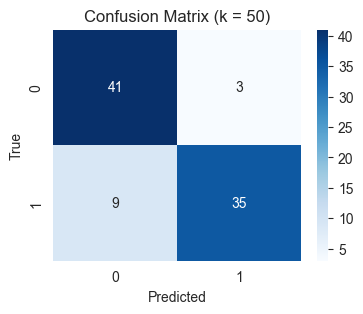

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# ===========================
# Final evaluation with k = 50
# ===========================
def evaluate_final_k(X_bal, y_bal, pos_words, neg_words):

    k = 50
    print(f"\n=== Final model using top {k} positive + top {k} negative words ===")

    # 1. Select the top 50 pos + 50 neg words
    pos_k = pos_words[:k]
    neg_k = neg_words[:k]
    selected_features = pos_k + neg_k

    # Ensure the selected features exist in TF-IDF columns
    selected_features = [w for w in selected_features if w in X_bal.columns]
    print(f"Total usable features: {len(selected_features)}")

    # 2. Subset TF-IDF matrix
    X_sub = X_bal[selected_features]

    # 3. Train logistic regression on full dataset
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_sub, y_bal)

    # 4. Predict on training data (you can later swap to test set if needed)
    y_pred = clf.predict(X_sub)

    # 5. Evaluation metrics
    print("Accuracy:", metrics.accuracy_score(y_bal, y_pred))
    print("Precision:", metrics.precision_score(y_bal, y_pred))
    print("Recall:", metrics.recall_score(y_bal, y_pred))
    print("\nClassification Report:\n",
          metrics.classification_report(y_bal, y_pred))

    # 6. Confusion matrix
    cm = metrics.confusion_matrix(y_bal, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Optional: show confusion matrix heatmap
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title("Confusion Matrix (k = 50)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    return clf, selected_features, cm

# =====================================
# Run final model
# =====================================
clf_50, features_50, cm_50 = evaluate_final_k(
    X_bal=X_bal,
    y_bal=y_bal,
    pos_words=pos_words,
    neg_words=neg_words
)
